Imports: 

In [6]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import QuantileRegressor
from sklearn.metrics import accuracy_score, average_precision_score


Loading Dataset:

In [7]:
wine = load_wine()
X = wine.data
y = wine.target
df = pd.DataFrame(X,columns=wine.feature_names)
df['target'] = y


Pre-processing Data: 

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.dtype)


float64


Defining and Trainig Model: 

In [9]:
quantile = QuantileRegressor()
quantile.fit(X_train,y_train)

QuantileRegressor()

Making Predictions on the Model: 

In [10]:
y_train_pred = quantile.predict(X_train)
y_test_pred = quantile.predict(X_test)


Evaluating the model: 

Training accuracy of the model: 0.4014084507042254
Testing accuracy of the model: 0.3888888888888889


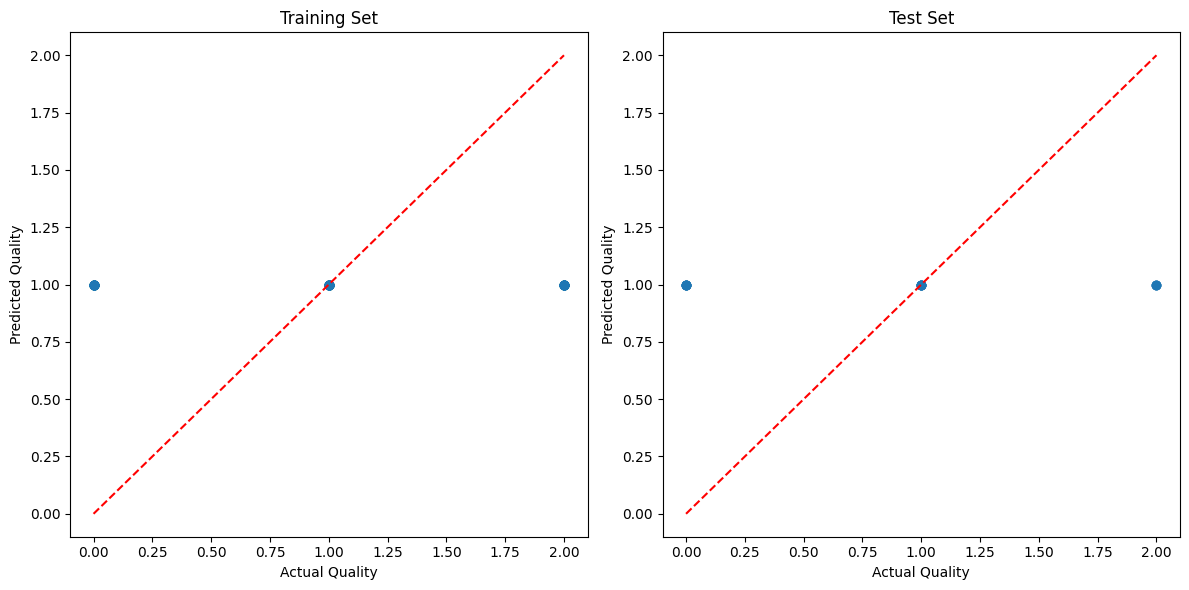

In [19]:
training_acc = accuracy_score(y_train,y_train_pred)
test_acc = accuracy_score(y_test,y_test_pred)
print(f'Training accuracy of the model: {training_acc}')
print(f'Testing accuracy of the model: {test_acc}')
plt.figure(figsize=(12, 6))
# Training plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Training Set')
# Test plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Test Set')
plt.tight_layout()
plt.show()